In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
import pandas as pd
df = pd.read_csv('DATA/library/bnb/topics.csv')

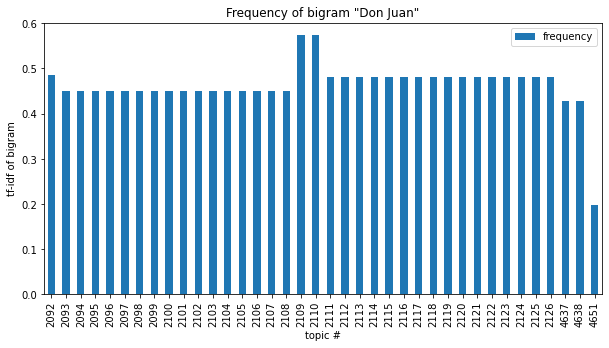

In [4]:
tf = TfidfVectorizer(ngram_range=(2,2), lowercase=False)
matrix = tf.fit_transform(df['Topic'])
arr = matrix.toarray()
# type(matrix)
feature_index = tf.vocabulary_.get('Don Juan')
feature_df = pd.DataFrame(arr[:, feature_index])
feature_df = feature_df[feature_df[0] != 0.0]
feature_df.reset_index(inplace = True)
feature_df.rename(columns = {'index':'topic', 0: 'frequency'}, inplace = True)
feature_df.plot(x='topic', y='frequency', kind='bar', figsize=(10,5), title='Frequency of bigram "Don Juan"')
plt.xlabel('topic #')
plt.ylabel('tf-idf of bigram')
plt.show()

In [5]:
tf = TfidfVectorizer(ngram_range=(2,2), lowercase=False)
matrix = tf.fit_transform(df['Topic'])
words_freqs = matrix.sum(axis=0)

feature_df = pd.DataFrame(arr[:, 0])

words_freqs[0, 0], feature_df.sum()

(1.8346115114924668,
 0    1.834612
 dtype: float64)

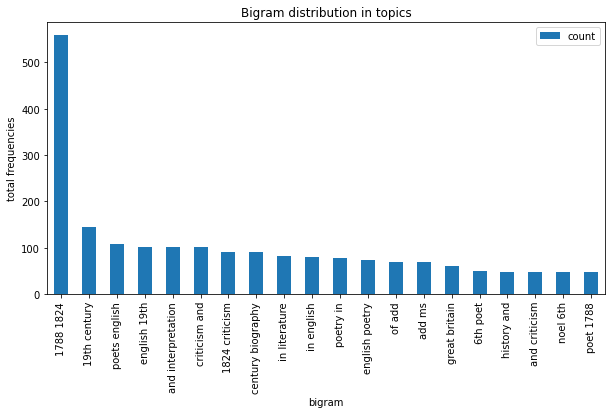

In [6]:
stop_list = ['byron', 'george', 'baron', 'gordon']
tf = TfidfVectorizer(ngram_range=(2,2), lowercase=True, stop_words=stop_list)
matrix = tf.fit_transform(df['Topic'])
total_words = matrix.sum(axis=0) # total words frequencies
# build list of (word, total word frequency)
# [0, idx] because total_words is 2-dimensial
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq = sorted(freq, key = lambda x: x[1], reverse=True)

bigram = pd.DataFrame(freq)
bigram.rename(columns={0: 'bigram', 1: 'count'}, inplace=True)
bigram = bigram.head(20)

bigram.plot(x='bigram', y='count', kind='bar', figsize=(10, 5), title='Bigram distribution in topics')
plt.ylabel('total frequencies')
plt.show()

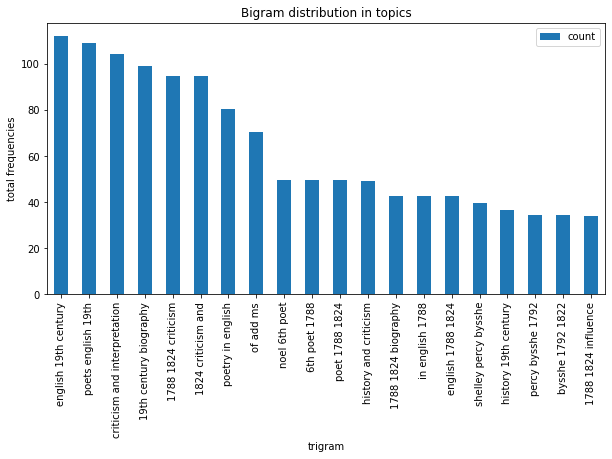

In [7]:
stop_list = ['byron', 'george', 'baron', 'gordon']
tf = TfidfVectorizer(ngram_range=(3,3), lowercase=True, stop_words=stop_list)
matrix = tf.fit_transform(df['Topic'])
total_words = matrix.sum(axis=0) # total words frequencies
# build list of (word, total word frequency)
# [0, idx] because total_words is 2-dimensial
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq = sorted(freq, key = lambda x: x[1], reverse=True)

bigram = pd.DataFrame(freq)
bigram.rename(columns={0: 'trigram', 1: 'count'}, inplace=True)
bigram = bigram.head(20)

bigram.plot(x='trigram', y='count', kind='bar', figsize=(10, 5), title='Bigram distribution in topics')
plt.ylabel('total frequencies')
plt.show()

In [37]:
from nltk.tokenize import RegexpTokenizer

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

df2 = df[df['Genre'].notnull()]
df2['Title'] = df2['Title'].str.lower()
df2['Title'] = df2['Title'].apply(func=remove_punctuation)
df2.drop_duplicates(subset='Title', keep='first', inplace=True)

title, genre = 'Lost angels', 'Biography'
title = title.lower()

data = df2.loc[df2['Genre'].str.contains(genre)]
# create new indices for interacting in all data frames
data.reset_index(level = 0, inplace = True)
# print('DATA!')
# print(data)

indices = pd.Series(data.index, index = data['Title'])
# print('indices!'.upper())
# print(indices)

tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(data['Title'])

sg = cosine_similarity(tfidf_matrix)
# print('sg!'.upper())
# print(sg)

# bad approach because there are many titles that includes particular phrases
# use command == title
idx = indices[indices.index.str.contains(title)][0]
# print(type(indices[indices.index.str.contains(title)]))
# enumerated indices sorrespondes indices in 'data'
sig = list(enumerate(sg[idx]))
sig = sorted(sig, key=lambda x: x[1], reverse=True)
sig = sig[1:6]

book_indices = [i[0] for i in sig]

pd.options.display.max_rows = 10
pd.options.display.max_columns = 3
pd.options.display.max_colwidth = 100
rec = data['Title'].iloc[book_indices]

print(rec)

20                                                    recollections of the last days of shelley and byron
0                                                                 records of shelley byron and the author
21                                               recollections of the last days of shelley and byron 1858
51           lives of the great romantics i shelley byron and wordsworth by their contemporaries volume 2
1     bajroni në shqipëri dhe takimet me ali pashë tepelenën vjeshtë 1809 me rastin e 200 vjetorit të ...
Name: Title, dtype: object


<ipython-input-37-4e451c958f27>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Title'] = df2['Title'].str.lower()
<ipython-input-37-4e451c958f27>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Title'] = df2['Title'].apply(func=remove_punctuation)
<ipython-input-37-4e451c958f27>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [9]:
from nltk.tokenize import RegexpTokenizer

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

df2 = df[df['Genre'].notnull()]
# df2 = df.copy()
df2['Title'] = df2['Title'].str.lower()
df2['Title'] = df2['Title'].apply(func=remove_punctuation)
df2.drop_duplicates(subset='Title', keep='first', inplace=True)
# print(df.shape, df2.shape)

title, genre = 'Lost angels', 'Biography'
title = title.lower()

data = df2.loc[df2['Genre'].str.contains(genre)]
data.reset_index(level = 0, inplace = True)
print(data)
indices = pd.Series(data.index, index = data['Title'])

tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(data['Title'])

sg = cosine_similarity(tfidf_matrix)

df3 = pd.DataFrame(sg)

pd.options.display.max_rows = 10
df3

    index  ... Provenance
0      21  ...        NaN
1      29  ...        NaN
2      68  ...        NaN
3      69  ...        NaN
4      87  ...        NaN
..    ...  ...        ...
67   1526  ...        NaN
68   1534  ...        NaN
69   1570  ...        NaN
70   1581  ...        NaN
71   1826  ...        NaN

[72 rows x 31 columns]


<ipython-input-9-bb3866c1403b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Title'] = df2['Title'].str.lower()
<ipython-input-9-bb3866c1403b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Title'] = df2['Title'].apply(func=remove_punctuation)
<ipython-input-9-bb3866c1403b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,0,...,71
0,1.0,...,0.0
1,0.0,...,0.0
2,0.0,...,0.0
3,0.0,...,0.0
4,0.0,...,0.0
...,...,...,...
67,0.0,...,0.0
68,0.0,...,0.0
69,0.0,...,0.0
70,0.0,...,0.0


In [15]:
df[df.Genre.isnull()].loc[:, ['Topic', 'Title', 'Genre']]

,Topic,Title,Genre
0,"A Beckett, Gilbert Abbott, barrister and comic writer",NaN,NaN
1,"A' Beckett, William",NaN,NaN
2,"A' Beckett, William",NaN,NaN
3,"Abbot, Charles, 1st Baron Colchester, Speaker of the House of Commons, 1757-1829",NaN,NaN
4,"Abbotsford, Roxburghshire","ORIGINAL letters of literary men, artists, and engravers, with a large number of engravings, the...",NaN
...,...,...,...
6295,"Zambelli, Aspasia Maria Paola Andriana",NaN,NaN
6296,"Zambelli, Aspasia Maria Paola Andriana",NaN,NaN
6297,"Zindorf, G-",NaN,NaN
6298,"de la Santísima Trinidad Bolívar y Palacios Ponte y Blanco, Simon, 'el Liberador', 1783-1830","AUTOGRAPH letters and signatures of Royal and illustrious persons, chiefly of England and France...",NaN


In [16]:
df_rec = pd.read_csv('DATA/library/bnb/records.csv')

In [19]:
df_rec[df_rec.Genre.isnull()].loc[:, ['Title', 'Genre']]

,Title,Genre
0,"Proceedings at the Presentation to Aberdeen Grammar School of Statue of Lord Byron, 14 September...",NaN
1,"Lord Byron. Sein Leben, seine Werke, sein Einfluss auf die deutsche Litteratur",NaN
2,"A Scourge for Lord Byron; or, 'Cain, a mystery' unmasked [In verse.]",NaN
3,"The Age of Bronze; or, Carmen seculare et annus haud mirabilis [By Lord Byron.]",NaN
4,"The Age of Bronze; or, Carmen seculare et annus haud mirabilis [By Lord Byron.]",NaN
...,...,...
3505,NaN,NaN
3506,NaN,NaN
3507,Stephen Oliver: Shorter secular vocal works,NaN
3508,John Gerrard Williams Collection: Vocal Works,NaN


In [26]:
pd.options.display.max_rows = 10
# pd.options.display.max_columns = 3
df_rec.loc[:, ['Genre', 'Title']]

,Genre,Title
0,NaN,"Proceedings at the Presentation to Aberdeen Grammar School of Statue of Lord Byron, 14 September..."
1,NaN,"Lord Byron. Sein Leben, seine Werke, sein Einfluss auf die deutsche Litteratur"
2,NaN,"A Scourge for Lord Byron; or, 'Cain, a mystery' unmasked [In verse.]"
3,NaN,"The Age of Bronze; or, Carmen seculare et annus haud mirabilis [By Lord Byron.]"
4,NaN,"The Age of Bronze; or, Carmen seculare et annus haud mirabilis [By Lord Byron.]"
...,...,...
3505,NaN,NaN
3506,NaN,NaN
3507,NaN,Stephen Oliver: Shorter secular vocal works
3508,NaN,John Gerrard Williams Collection: Vocal Works


In [38]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_rec.iloc[0:5, 0:]

,BL record ID,Type of resource,Content type,Material type,BNB number,Archival Resource Key,ISBN,Name,Dates associated with name,Type of name,Role,All names,Title,Variant titles,Series title,Number within series,Country of publication,Place of publication,Publisher,Date of creation/publication,Edition,Physical description,Dewey classification,BL shelfmark,Topics,Genre,Languages,Notes,Provenance
0,000006560,Monograph,Language material ; Text,Volume,NaN,NaN,NaN,Grammar School (Aberdeen),NaN,organisation,NaN,"Byron, George Gordon Byron, Baron, 1788-1824 [person] ; Grammar School (Aberdeen) [organisation]","Proceedings at the Presentation to Aberdeen Grammar School of Statue of Lord Byron, 14 September...",Appendix. Miscellaneous,NaN,NaN,Scotland,Aberdeen,NaN,1923,NaN,34 pages (8°),NaN,010856.c.8,NaN,NaN,NaN,NaN,NaN
1,000011796,Monograph,Language material ; Text,Volume,NaN,NaN,NaN,"Ackermann, Richard",NaN,person,NaN,"Byron, George Gordon Byron, Baron, 1788-1824 [person] ; Ackermann, Richard [person]","Lord Byron. Sein Leben, seine Werke, sein Einfluss auf die deutsche Litteratur",Appendix. Biography and Criticism,NaN,NaN,NaN,Heidelberg,NaN,1901,NaN,"xx, 188 pages (8°)",NaN,10856.g.17,NaN,NaN,German,NaN,NaN
2,000016652,Monograph,Language material ; Text,Volume,NaN,NaN,NaN,"Adams, Thomas",NaN,person,author,"Adams, Thomas, author [person] ; Byron, George Gordon Byron, Baron, 1788-1824 [person]","A Scourge for Lord Byron; or, 'Cain, a mystery' unmasked [In verse.]",Single Works. Cain. Appendix,NaN,NaN,England,London,T. Adams,1823,NaN,33 pages (8°),NaN,11601.dd.10. (6.),NaN,NaN,NaN,NaN,NaN
3,000029006,Monograph,Language material ; Text,Volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Byron, George Gordon Byron, Baron, 1788-1824 [person]","The Age of Bronze; or, Carmen seculare et annus haud mirabilis [By Lord Byron.]",Single Works. The Age of Bronze,NaN,NaN,England,London,John Hunt,1823,NaN,36 pages (8°),NaN,11614.bb.7. (3.) ; 11643.bbb.17. (6.) ; 11658.g.163. (1.) ; Ashley2704 ; Ashley5456*,NaN,NaN,English,"Other edition: The Age of Bronze; or, Carmen seculare et annus haud mirabilis [By Lord Byron.]. ...",NaN
4,000029007,Monograph,Language material ; Text,Volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Byron, George Gordon Byron, Baron, 1788-1824 [person]","The Age of Bronze; or, Carmen seculare et annus haud mirabilis [By Lord Byron.]",Single Works. The Age of Bronze,NaN,NaN,England,London,John Hunt,1823,Second edition,36 pages (8°),NaN,11646.ff.21,NaN,NaN,English,NaN,NaN


In [62]:
from nltk.tokenize import RegexpTokenizer

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

df2 = df[df['Genre'].notnull()]
df2['format_title'] = df2['Title'].str.lower()
df2['format_title'] = df2['format_title'].apply(func=remove_punctuation)
df2.drop_duplicates(subset='format_title', keep='first', inplace=True)

title, genre = 'The Shelley-Byron men : lost angels of a ruined paradise', 'Biography'
# title = title.lower()

data = df2.loc[df2['Genre'].str.contains(genre)]
# create new indices for interacting in all data frames
data.reset_index(level = 0, inplace = True)
pd.options.display.max_colwidth = 50
print('DATA!')
print(data.iloc[:, 0:2])

indices = pd.Series(data.index, index = data['Title'])

print('indices!'.upper())
print(indices)

tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(data['format_title'])

sg = cosine_similarity(tfidf_matrix)
print('sg!'.upper())
print(pd.DataFrame(sg))

# bad approach because there are many titles that includes particular phrases
# use command == title
# print(type(indices), indices, sep='\n')
idx = indices[title]
# print(type(indices[indices.index.str.contains(title)]))
# enumerated indices sorrespondes indices in 'data'
sig = list(enumerate(sg[idx]))
print('sig!'.upper())
print(pd.DataFrame(sig))
sig = sorted(sig, key=lambda x: x[1], reverse=True)
sig = sig[1:6]

book_indices = [i[0] for i in sig]

pd.options.display.max_rows = 10
pd.options.display.max_columns = 3
pd.options.display.max_colwidth = 100
rec = data['Title'].iloc[book_indices]

print(rec)

DATA!
    index                                              Topic
0      21  Adventure and adventurers--Great Britain--Biog...
1      29                         Albania--Intellectual life
2      68  Aristocracy (Social class)--England--Nottingha...
3      69  Aristocracy (Social class)--Great Britain--Bio...
4      87                           Aromanians in literature
..    ...                                                ...
67   1526  Byron, George Gordon Byron, Baron, 1788-1824--...
68   1534  Byron, George Gordon Byron, Baron, 1788-1824--...
69   1570  Byron, George Gordon Byron, Baron, 1788-1824--...
70   1581  Byron, George Gordon Byron, Baron, 1788-1824--...
71   1826           Chubynsʹkyĭ, Pavlo, 1839-1884--Biography

[72 rows x 2 columns]
INDICES!
Title
Records of Shelley, Byron, and the author                                                                            0
Bajroni në Shqipëri dhe takimet me Ali Pashë Tepelenën (vjeshtë 1809) : me rastin e 200-vjetorit të visit

<ipython-input-62-b339b5adc188>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['format_title'] = df2['Title'].str.lower()
<ipython-input-62-b339b5adc188>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['format_title'] = df2['format_title'].apply(func=remove_punctuation)
<ipython-input-62-b339b5adc188>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [126]:
# pd.options.display.max_rows = 10
# pd.options.display.max_columns = 3
# pd.options.display.max_colwidth = 100

from nltk.tokenize import RegexpTokenizer

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

title, genre = 'The Shelley-Byron men : lost angels of a ruined paradise', 'Biography'

df2 = df[df['Genre'].notnull()]
df2['format_title'] = df2['Title'].str.lower()
df2['format_title'] = df2['format_title'].apply(func=remove_punctuation)
df2.drop_duplicates(subset='format_title', keep='first', inplace=True)

data = df2[df2['Genre'].str.contains(genre)]
# create new indices for interacting in all data frames
data.reset_index(level = 0, inplace = True)
# print('DATA!')
# print(data.iloc[:, 0:2])

idx = data.index[data['Title'] == title][0]

tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(data['format_title'])
# automatically change specified idx [k:k+n] to 0 .. n-1
tt_matrix = tfidf_matrix[idx]
# print(type(tt_matrix), tt_matrix)
# print(type(tfidf_matrix), tfidf_matrix, sep='\n')

sim_arr = cosine_similarity(tt_matrix, tfidf_matrix)[0]

# enumerated array elements sorrespondes indices in 'data'
idx_sim = list(enumerate(sim_arr))
idx_sim = sorted(idx_sim, key=lambda x: x[1], reverse=True)
idx_sim = idx_sim[1:6]

book_indices = [i[0] for i in idx_sim]

rec = data['Title'].iloc[book_indices]

print(rec)

20                                                    Recollections of the last days of Shelley and Byron
0                                                               Records of Shelley, Byron, and the author
21                                             Recollections of the last days of Shelley and Byron : 1858
51        Lives of the great Romantics I. Shelley, Byron and Wordsworth by their contemporaries. Volume 2
1     Bajroni në Shqipëri dhe takimet me Ali Pashë Tepelenën (vjeshtë 1809) : me rastin e 200-vjetorit...
Name: Title, dtype: object


<ipython-input-126-e5fa3f4d2413>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['format_title'] = df2['Title'].str.lower()
<ipython-input-126-e5fa3f4d2413>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['format_title'] = df2['format_title'].apply(func=remove_punctuation)
<ipython-input-126-e5fa3f4d2413>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

numpy.ndarray